In [1]:
import os
import statistics
import json
import glob
from matplotlib import pyplot as plt
from posixpath import basename
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib
import csv
import matplotlib.colors as mcolors

In [2]:
class Cal_result(object):
    def __init__(self):
        self.mat_size=0
        self.steps = []
        self.avg_iterations = []
        self.line_search_iterations = []
        self.time_assembly = []
        self.time_inverting = []
        self.time_line_search = []
        self.total_time = []

In [3]:
def get_iter_par(path):
    with open(path, 'r') as f:
        json_data = json.load(f)
    tmp_result = Cal_result()
    solver_info=json_data["solver_info"]
    tmp_result.mat_size=json_data["mat_size"]
    for tmp_info in solver_info:
        tmp_result.steps.append(tmp_info["info"]["iterations"])
        tmp_result.total_time.append(tmp_info["info"]["total_time"])
        tmp_result.time_inverting.append(tmp_info["info"]["iterations"]*tmp_info["info"]["time_inverting"])
        tmp_result.time_assembly.append(tmp_info["info"]["iterations"]*tmp_info["info"]["time_assembly"])
        tmp_result.time_line_search.append(tmp_info["info"]["iterations"]*tmp_info["info"]["time_line_search"])        
    return tmp_result

In [4]:
def get_iter(path):
    with open(path, 'r') as f:
        json_data = json.load(f)
    tmp_result = Cal_result()
    solver_info=json_data["solver_info"]
    tmp_result.mat_size=json_data["mat_size"]
    for tmp_info in solver_info:
        tmp_iter=[]
        for temp in tmp_info["info"]["internal_solver"]:
            tmp_iter.append(temp["num_iterations"])
        tmp_result.avg_iterations.append(np.average(tmp_iter))
        tmp_result.steps.append(tmp_info["info"]["iterations"])
        tmp_result.total_time.append(tmp_info["info"]["total_time"])
        tmp_result.time_inverting.append(tmp_info["info"]["iterations"]*tmp_info["info"]["time_inverting"])
        tmp_result.time_assembly.append(tmp_info["info"]["iterations"]*tmp_info["info"]["time_assembly"])
        tmp_result.time_line_search.append(tmp_info["info"]["iterations"]*tmp_info["info"]["time_line_search"])
    return tmp_result

In [5]:
def df_create(result_list):
    columns=["Mat size","Steps","Avg iterations","Total time","Time assembly","Time inverting","Time line search"]
    df = pd.DataFrame(columns=columns)
    for tmp_result in result_list:
        df = df.append(pd.DataFrame([[tmp_result.mat_size,np.sum(tmp_result.steps),np.sum(tmp_result.avg_iterations),np.sum(tmp_result.total_time),np.sum(tmp_result.time_assembly),np.sum(tmp_result.time_inverting),np.sum(tmp_result.time_line_search)]],columns=columns),ignore_index=True)
    return df

In [6]:
ts_result_20=get_iter("/home/yiwei/result_test/mat-twist-neo/update_vec_timestep_backup/Trilinos/mat20x20/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
ori_result_20=get_iter("/home/yiwei/result_test/mat-twist-neo/update_vec_newton_thin_mat/Trilinos/mat20x20/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")

In [17]:
result_20=get_iter("/home/yiwei/tmp_test/new_twist/Trilinos/mat_20/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
result_40=get_iter("/home/yiwei/tmp_test/new_twist/Trilinos/mat_40/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
result_60=get_iter("/home/yiwei/tmp_test/new_twist/Trilinos/mat_60/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
result_80=get_iter("/home/yiwei/tmp_test/new_twist/Trilinos/mat_80/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
result_100=get_iter("/home/yiwei/tmp_test/new_twist/Trilinos/mat100x100t40/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
result_150=get_iter("/home/yiwei/result_test/mat-twist-neo/update_vec_newton/Trilinos/mat150x150t40/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
result_225=get_iter("/home/yiwei/result_test/mat-twist-neo/update_vec_newton/Trilinos/mat225x225t40/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
df=df_create([result_20,result_40,result_60,result_80,result_100,result_150,result_225])

/tmp/ipykernel_2767731/3771932962.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[tmp_result.mat_size,np.sum(tmp_result.steps),np.sum(tmp_result.avg_iterations),np.sum(tmp_result.total_time),np.sum(tmp_result.time_assembly),np.sum(tmp_result.time_inverting),np.sum(tmp_result.time_line_search)]],columns=columns),ignore_index=True)
/tmp/ipykernel_2767731/3771932962.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[tmp_result.mat_size,np.sum(tmp_result.steps),np.sum(tmp_result.avg_iterations),np.sum(tmp_result.total_time),np.sum(tmp_result.time_assembly),np.sum(tmp_result.time_inverting),np.sum(tmp_result.time_line_search)]],columns=columns),ignore_index=True)
/tmp/ipykernel_2767731/3771932962.py:5: FutureWarning: The frame.append method is deprecat

In [8]:
len(result_20.steps)

25

In [9]:
par_result_20=get_iter_par("/home/yiwei/tmp_test/new_twist/Eigen::PardisoLLT/mat_20/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
par_result_40=get_iter_par("/home/yiwei/tmp_test/new_twist/Eigen::PardisoLLT/mat_40/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
par_result_60=get_iter_par("/home/yiwei/tmp_test/new_twist/Eigen::PardisoLLT/mat_60/mat-twist_new/P1/ref0/block3/Thread8/0/json/result.json")
par_result_80=get_iter_par("/home/yiwei/tmp_test/old_twist/Eigen::PardisoLLT/mat_80/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
par_result_100=get_iter_par("/home/yiwei/result_test/mat-twist-neo/update_vec_newton/Eigen::PardisoLLT/mat100x100t40/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
par_result_150=get_iter_par("/home/yiwei/result_test/mat-twist-neo/update_vec_newton/Eigen::PardisoLLT/mat150x150t40/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
par_result_225=get_iter_par("/home/yiwei/result_test/mat-twist-neo/update_vec_newton/Eigen::PardisoLLT/mat225x225t40/mat-twist/P1/ref0/block3/Thread8/0/json/result.json")
par_df=df_create([par_result_20,par_result_40,par_result_60,par_result_80,par_result_100,par_result_150,par_result_225])

/tmp/ipykernel_2767731/3771932962.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[tmp_result.mat_size,np.sum(tmp_result.steps),np.sum(tmp_result.avg_iterations),np.sum(tmp_result.total_time),np.sum(tmp_result.time_assembly),np.sum(tmp_result.time_inverting),np.sum(tmp_result.time_line_search)]],columns=columns),ignore_index=True)
/tmp/ipykernel_2767731/3771932962.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[tmp_result.mat_size,np.sum(tmp_result.steps),np.sum(tmp_result.avg_iterations),np.sum(tmp_result.total_time),np.sum(tmp_result.time_assembly),np.sum(tmp_result.time_inverting),np.sum(tmp_result.time_line_search)]],columns=columns),ignore_index=True)
/tmp/ipykernel_2767731/3771932962.py:5: FutureWarning: The frame.append method is deprecat

In [11]:
cmap=['b','g','r','c','m','y','k','blueviolet','chartreuse','maroon']
def output(ax,iter,label_,c_index,showdata=None):
    from matplotlib.ticker import MaxNLocator
    xdata=range(1,len(iter)+1)
    ydata=iter
    # ax_.scatter(xdata,ydata,label=label_,color=cmap_[cindex_])
    ax.scatter(xdata,ydata,color=cmap[c_index])
    # label_=label_+", k="+str("%.2f" % coeffs[degree-1])
    # ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    ax.plot(xdata,ydata,color=cmap[c_index],label=label_)
    if showdata ==1:
        for i in range(0,len(xdata),showdata):
            ax.annotate('%d'%xdata[i], (xdata[i], ydata[i]))
    if showdata ==2:
        for i in range(0,len(xdata),showdata):
            ax.annotate('%.1f'%ydata[i], (xdata[i], ydata[i]))


Text(0.5, 0, 'Time steps')

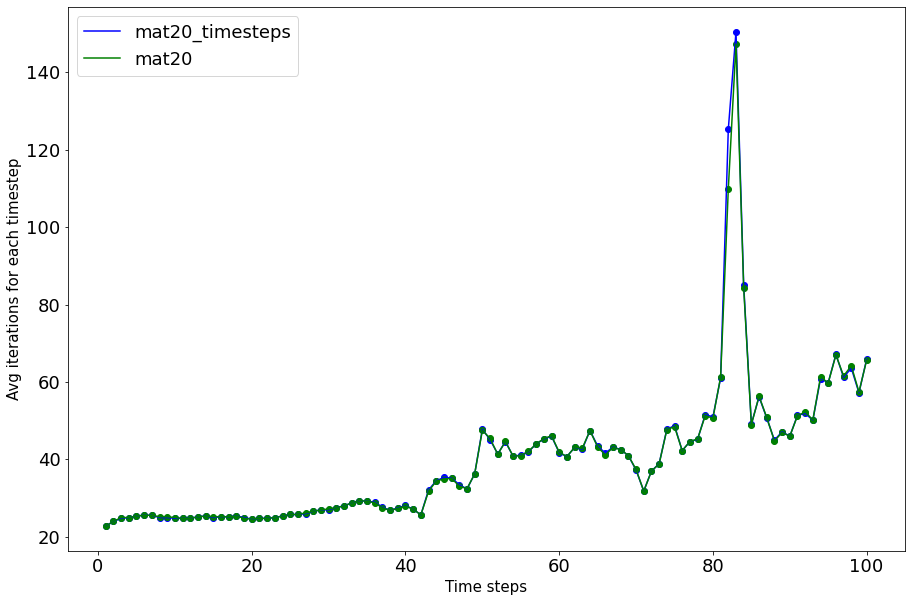

In [11]:
fig,ax=plt.subplots(figsize=(15,10))

plt.rcParams.update({'font.size': 18}) # font size

output(ax,ts_result_20.avg_iterations,"mat20_timesteps",0)
output(ax,ori_result_20.avg_iterations,"mat20",1)

# output(ax,result_20.avg_iterations,"mat20",0)
# output(ax,result_40.avg_iterations,"mat40",1)
# output(ax,result_60.avg_iterations,"mat60",2,1)
# output(ax,result_80.avg_iterations,"mat80",3)
# output(ax,result_100.avg_iterations,"mat100",4)
# output(ax,result_150.avg_iterations,"mat150",5)
# output(ax,result_225.avg_iterations,"mat225",6,1)
ax.legend()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Avg iterations for each timestep",fontsize=15) # y labels
ax.set_xlabel("Time steps",fontsize=15) # x labels

Text(0.5, 0, 'Time steps')

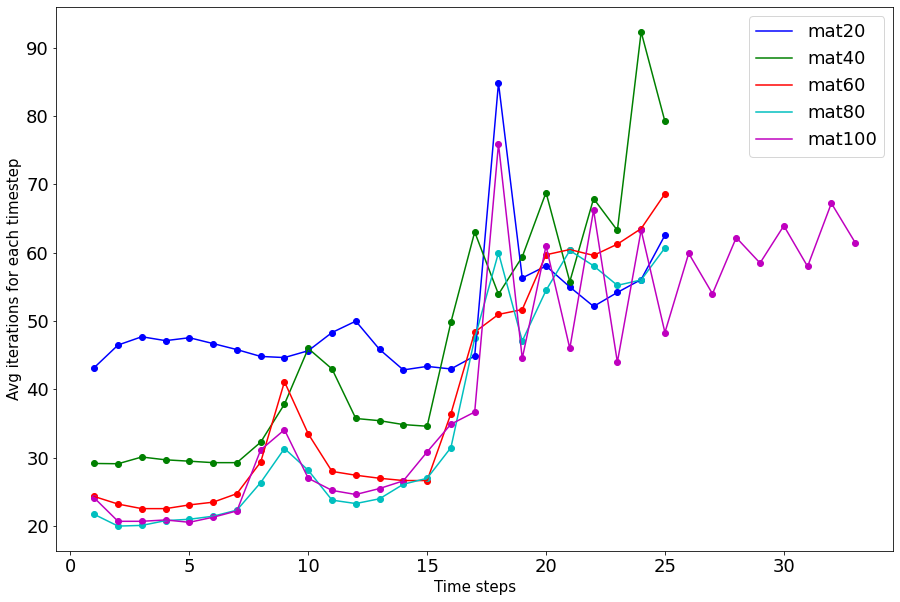

In [16]:

fig,ax=plt.subplots(figsize=(15,10))

plt.rcParams.update({'font.size': 18}) # font size

# output(ax,ts_iter_20,"mat20_timesteps",0)
# output(ax,ori_iter_20,"mat20",1)

output(ax,result_20.avg_iterations,"mat20",0)
output(ax,result_40.avg_iterations,"mat40",1)
output(ax,result_60.avg_iterations,"mat60",2)
output(ax,result_80.avg_iterations,"mat80",3)
output(ax,result_100.avg_iterations,"mat100",4)
# output(ax,result_150.avg_iterations,"mat150",5)
# output(ax,result_225.avg_iterations,"mats225",6)
ax.legend()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Avg iterations for each timestep",fontsize=15) # y labels
ax.set_xlabel("Time steps",fontsize=15) # x labels

Text(0.5, 0, 'Time steps')

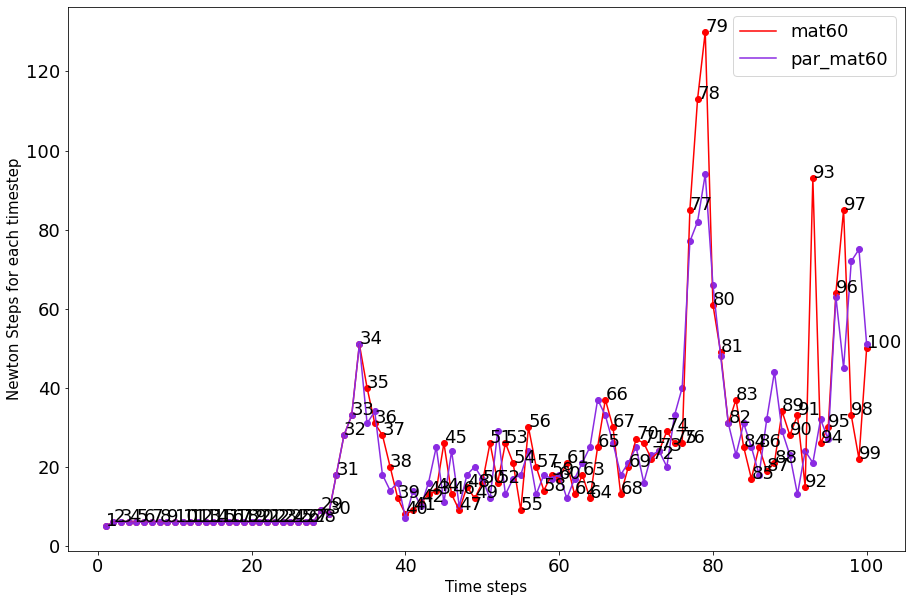

In [13]:
fig,ax=plt.subplots(figsize=(15,10))

plt.rcParams.update({'font.size': 18}) # font size
# output(ax,result_20.steps,"mat20",0)
# output(ax,result_40.steps,"mat40",1)
# output(ax,result_60.steps,"mat60",2)
# output(ax,result_80.steps,"mat80",3)
# output(ax,result_100.steps,"mat100",4)
# output(ax,result_150.steps,"mat150",5)
# output(ax,result_225.steps,"mat225",6)

output(ax,result_60.steps,"mat60",2,1)
output(ax,par_result_60.steps,"par_mat60",7)


ax.legend()
# fit("Hypre",3,ax,result_df,cmap,3)
# fit("Eigen::CholmodSupernodalLLT",1,ax,result_df,cmap,4)
# fit("Eigen::PardisoLDLT",1,ax,result_df,cmap,5)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Newton Steps for each timestep",fontsize=15) # y labels
ax.set_xlabel("Time steps",fontsize=15) # x labels

Text(0.5, 0, 'Time steps')

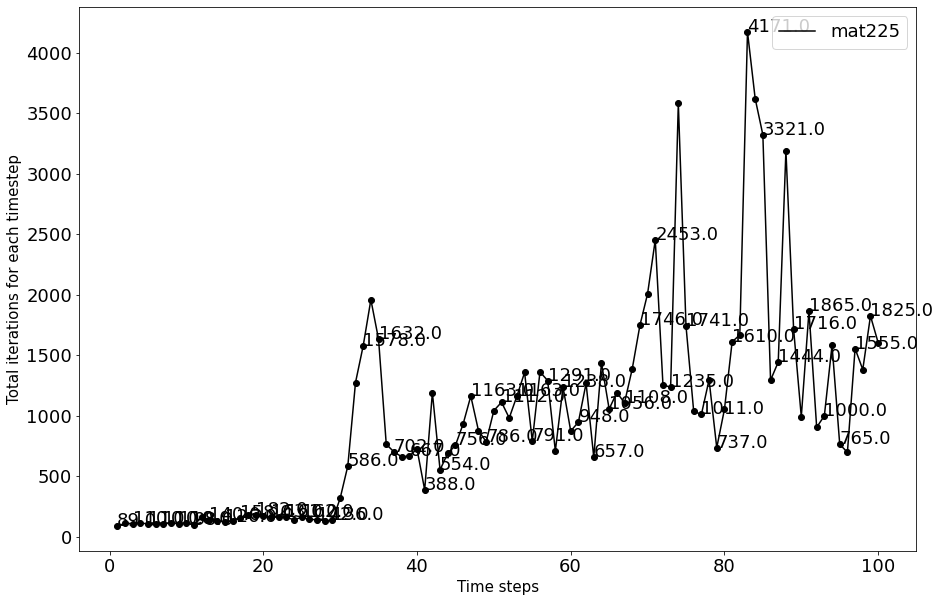

In [14]:
fig,ax=plt.subplots(figsize=(15,10))

plt.rcParams.update({'font.size': 18}) # font size

# output(ax,np.multiply(np.array(iter_20),np.array(steps_20)),"mat20",0)
# output(ax,np.multiply(np.array(iter_40),np.array(steps_40)),"mat40",1)
# output(ax,np.multiply(np.array(iter_60),np.array(steps_60)),"mat60",2)
# output(ax,np.multiply(np.array(iter_80),np.array(steps_80)),"mat80",3)
# output(ax,np.multiply(np.array(iter_100),np.array(steps_100)),"mat100",4)
# output(ax,np.multiply(np.array(iter_150),np.array(steps_150)),"mat150",5)
output(ax,np.multiply(np.array(result_225.avg_iterations),np.array(result_225.steps)),"mat225",6,2)


ax.legend()
# fit("Hypre",3,ax,result_df,cmap,3)
# fit("Eigen::CholmodSupernodalLLT",1,ax,result_df,cmap,4)
# fit("Eigen::PardisoLDLT",1,ax,result_df,cmap,5)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Total iterations for each timestep",fontsize=15) # y labels
ax.set_xlabel("Time steps",fontsize=15) # x labels

Text(0.5, 0, 'Time steps')

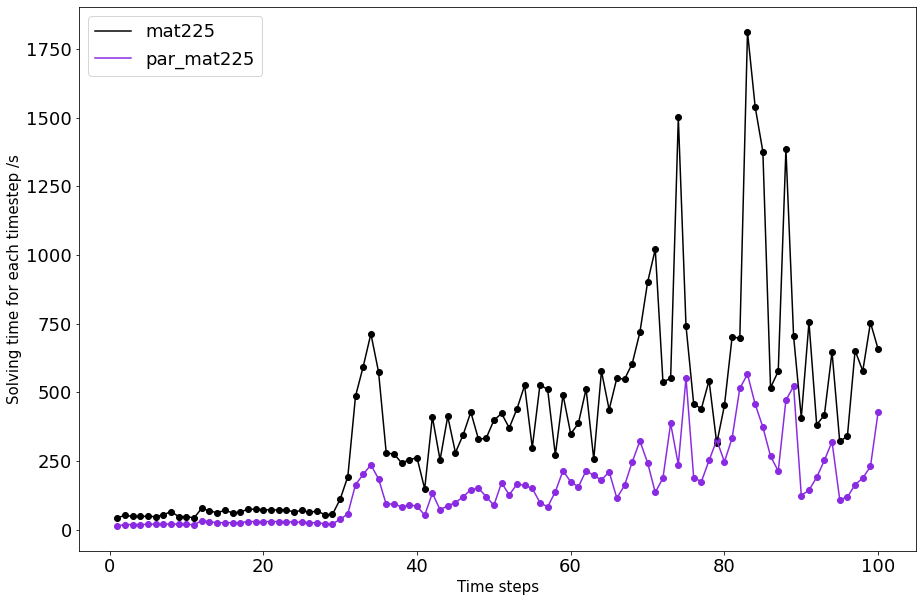

In [15]:
fig,ax=plt.subplots(figsize=(15,10))

plt.rcParams.update({'font.size': 18}) # font size
# output(ax,time_20,"mat20",0)
# output(ax,time_40,"mat40",1)
# output(ax,time_60,"mat60",2)
# output(ax,time_80,"mat80",3)
# output(ax,time_100,"mat100",4)
# output(ax,time_150,"mat150",5)
output(ax,result_225.time_inverting,"mat225",6)

# output(ax,par_time_20,"par_mat20",1)
# output(ax,par_time_40,"par_mat40",2)
# output(ax,par_time_60,"par_mat60",3)
# output(ax,par_time_80,"par_mat80",4)
# output(ax,par_time_100,"par_mat100",5)
# output(ax,par_time_150,"par_mat150",6)
output(ax,par_result_225.time_inverting,"par_mat225",7)




ax.legend()
# fit("Hypre",3,ax,result_df,cmap,3)
# fit("Eigen::CholmodSupernodalLLT",1,ax,result_df,cmap,4)
# fit("Eigen::PardisoLDLT",1,ax,result_df,cmap,5)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Solving time for each timestep /s",fontsize=15) # y labels
ax.set_xlabel("Time steps",fontsize=15) # x labels

Text(0.5, 0.98, 'Mat twist')

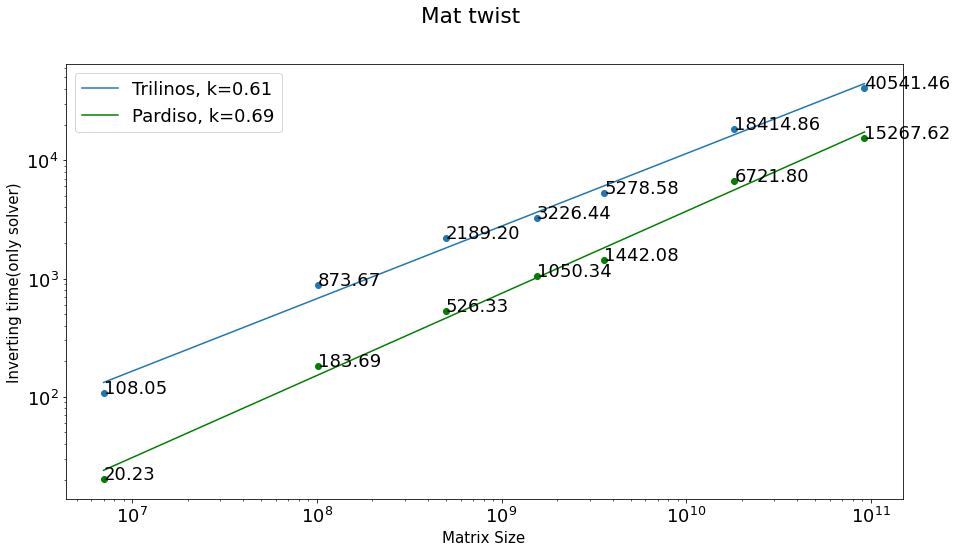

In [16]:
def fit(xdata,ydata,solverlabel_,ax_,cmap_,cindex_):
    degree=1   
    logx = np.log(xdata)
    # logx=logx/2
    logy = np.log(ydata)
    coeffs = np.polyfit(logx,logy,deg=degree)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    label_=solverlabel_
    ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    label_=label_+", k="+str("%.2f" % coeffs[degree-1])
    # ax_.plot(xdata,ydata,color=cmap_[cindex_],label=label_,marker='o')
    ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    for i in range(len(xdata)):
        ax_.annotate('%.2f'%ydata[i], (xdata[i], ydata[i]))
fig,ax=plt.subplots(1,1,figsize=(15,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
label=""
data_frame=None
fit(np.float64(df['Mat size']),np.float64(df['Time inverting']),"Trilinos",ax,list(mcolors.TABLEAU_COLORS),0)
fit(np.float64(par_df['Mat size']),np.float64(par_df['Time inverting']),"Pardiso",ax,cmap,1)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Inverting time(only solver)",fontsize=15) # y labels
ax.set_xlabel("Matrix Size",fontsize=15) # x labels
plt.suptitle("Mat twist")

Text(0.5, 0.98, 'Mat twist')

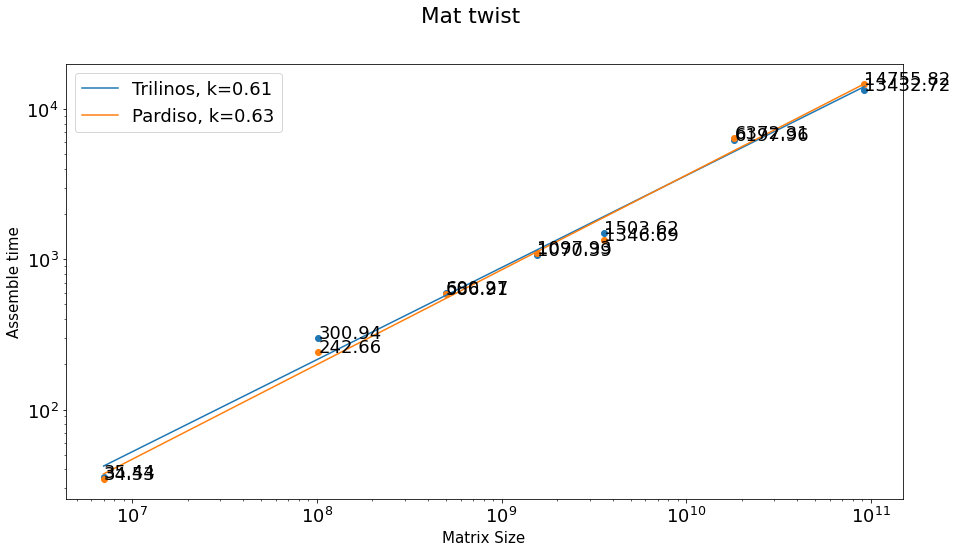

In [42]:
fig,ax=plt.subplots(1,1,figsize=(15,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
label=""
data_frame=None
fit(np.float64(df['Mat size']),np.float64(df['Time assembly']),"Trilinos",ax,list(mcolors.TABLEAU_COLORS),0)
fit(np.float64(par_df['Mat size']),np.float64(par_df['Time assembly']),"Pardiso",ax,list(mcolors.TABLEAU_COLORS),1)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Assemble time",fontsize=15) # y labels
ax.set_xlabel("Matrix Size",fontsize=15) # x labels
plt.suptitle("Mat twist")

Text(0.5, 0.98, 'Mat twist')

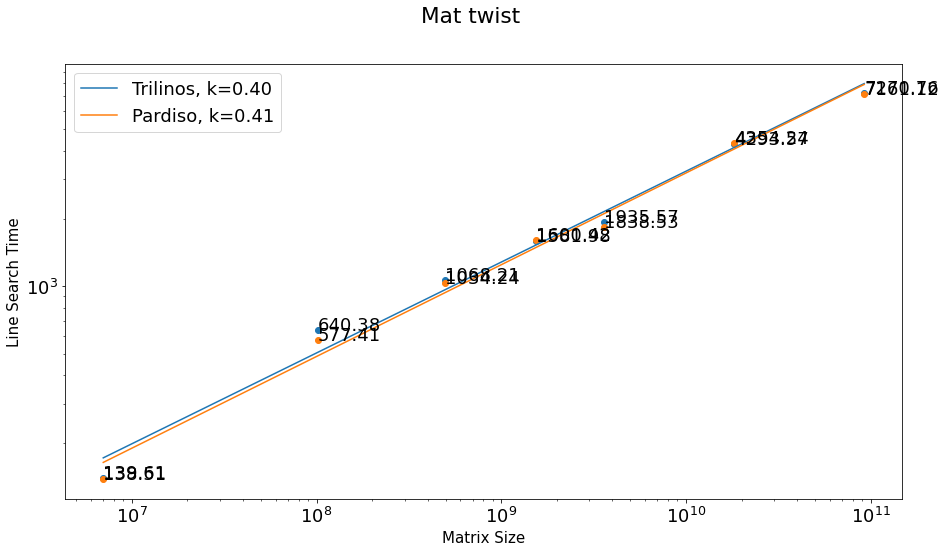

In [43]:
fig,ax=plt.subplots(1,1,figsize=(15,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
label=""
data_frame=None
fit(np.float64(df['Mat size']),np.float64(df['Time line search']),"Trilinos",ax,list(mcolors.TABLEAU_COLORS),0)
fit(np.float64(par_df['Mat size']),np.float64(par_df['Time line search']),"Pardiso",ax,list(mcolors.TABLEAU_COLORS),1)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Line Search Time",fontsize=15) # y labels
ax.set_xlabel("Matrix Size",fontsize=15) # x labels
plt.suptitle("Mat twist")